In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.6 MB/s 
     |████████████████████████████████| 9.9 MB 39.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pmdarima as pm

In [3]:
from pmdarima.arima import auto_arima

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [6]:
 # our dataset series analysis manually

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [9]:
Data  = pd.read_csv('/content/export-AvgGasPrice.csv',index_col=0,parse_dates = True)

In [10]:
Data.head()

,cost
Date,
2015-08-07,6.050000e+03
2015-08-08,3.230000e+06
2015-08-09,4.750000e+06
2015-08-10,4.220000e+06
2015-08-11,7.783882e+05


In [11]:
Data.shape

(2656, 1)

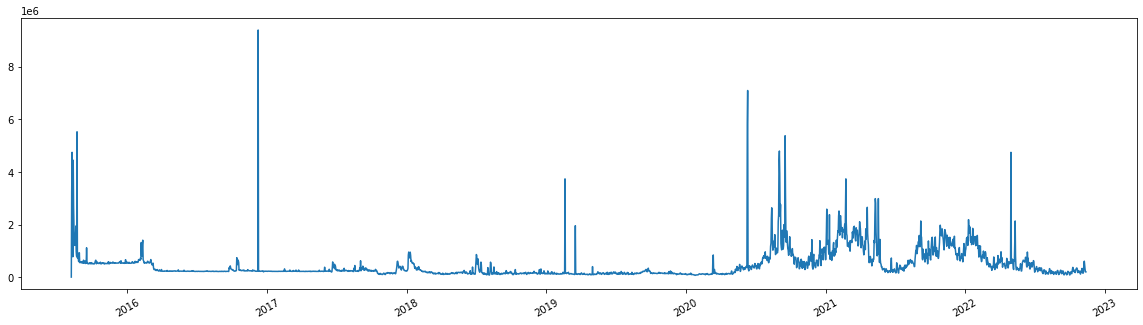

In [12]:
plt.plot(Data['cost'])
plt.xticks(rotation=30)
plt.show()

In [13]:
# at some instances there is seasonality component which is visible

In [14]:
#so rolling average transform
rollingdata = Data[1800:2500].rolling(window=20) #finding rolling series mean MA20
rollingmean = rollingdata.mean()
print(rollingmean)

                     cost
Date                     
2020-07-11            NaN
2020-07-12            NaN
2020-07-13            NaN
2020-07-14            NaN
2020-07-15            NaN
...                   ...
2022-06-06  427646.475485
2022-06-07  443236.140990
2022-06-08  465796.898865
2022-06-09  487453.443850
2022-06-10  503902.403995

[700 rows x 1 columns]


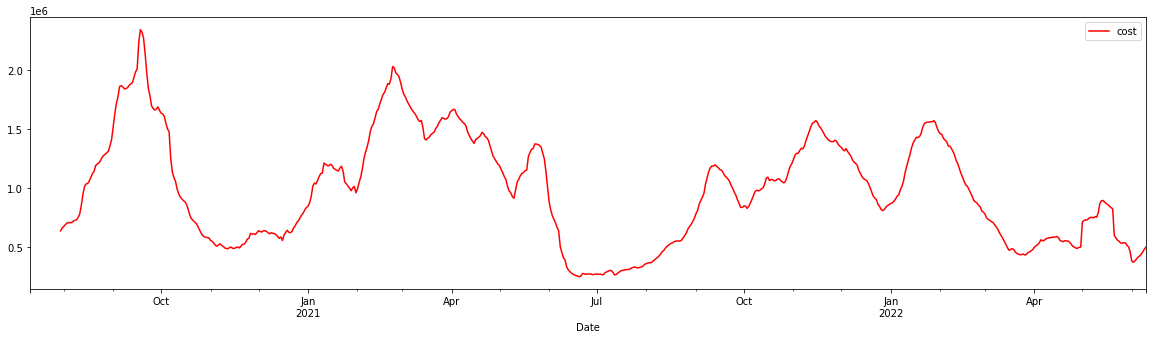

In [15]:
rollingmean.plot(color = 'red')
plt.show()

In [16]:
# as above if we change our window size we got more pits and lands in series
#so seasonality is smoothen

Simple Exponential smoothing

In [17]:
fit1 = SimpleExpSmoothing(Data[1800:2500]).fit(smoothing_level=0.2,optimized=False)  #here we are setting the value of alpha i.e how musch weightage we want to assign to the current observation
fit2 = SimpleExpSmoothing(Data[1800:2500]).fit(smoothing_level=0.8,optimized=False)  #0.2 and 0.8 to current observation and 80 , 20 to prevoius one respectivly


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


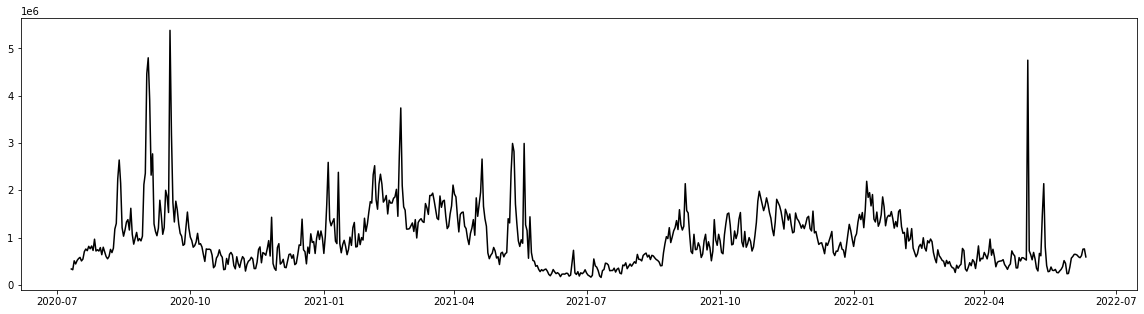

In [18]:
plt.plot(Data[1800:2500],color = 'black')

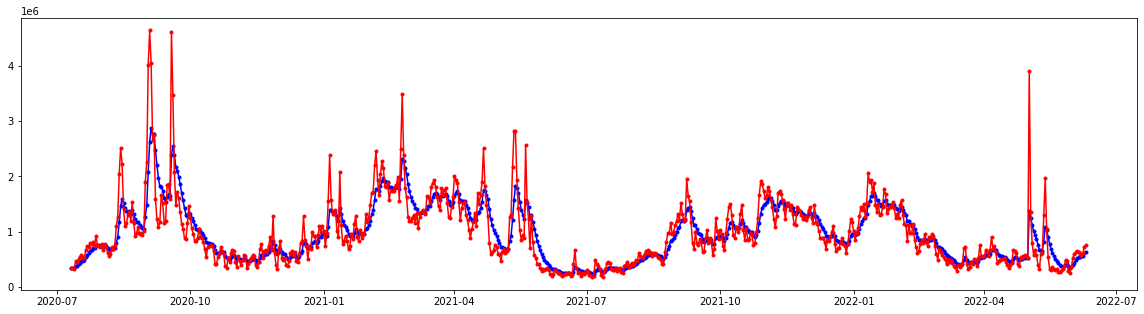

In [19]:
plt.plot(fit1.fittedvalues, marker ='.',color = 'blue')
plt.plot(fit2.fittedvalues, marker = '.', color = 'red')

blue : alpha = 80% weightage ,
red : alpha = 20% weightage 

In [20]:
holt1 = Holt(Data[1800:2500]).fit()  # linear trend consideration
holt2 = Holt(Data[1800:2500],exponential = True).fit()  # exponential trend consideration

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


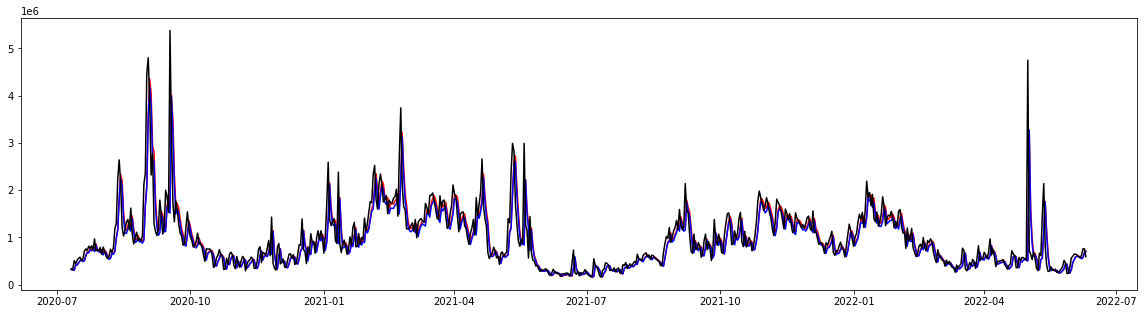

In [21]:
plt.plot(holt1.fittedvalues, color ='red')
plt.plot(holt2.fittedvalues,color ='blue')
plt.plot(Data[1800:2500],color = 'black')

In [22]:
#Decomposition of time series to check its components

In [23]:
#Multiplicative Decompose
mul_data = seasonal_decompose(Data[1800:2500], model = 'multiplicative',period = 1)

#Additive Decompose
add_result = seasonal_decompose(Data[1800:2500], model = 'additive',period = 1)

Text(0.5, 0.98, '\n Multiplicative Decompose')

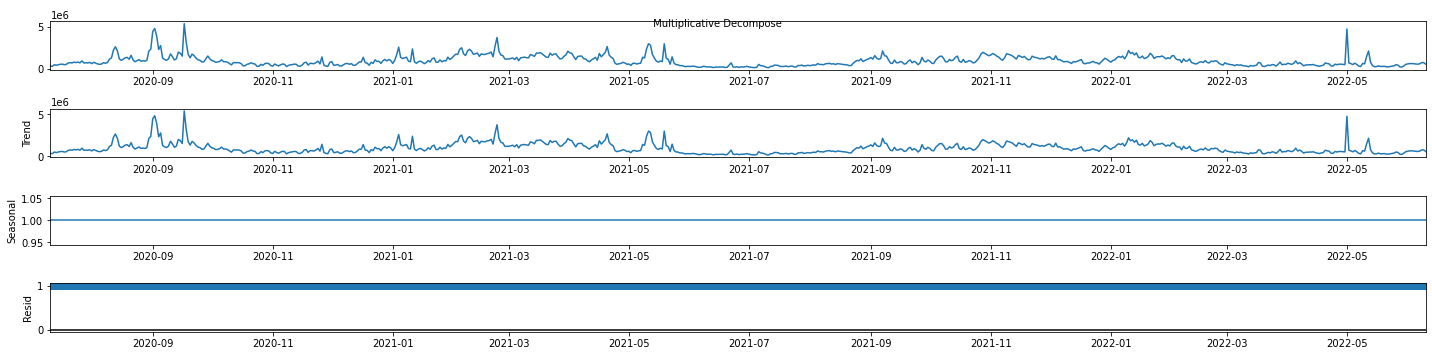

In [24]:
mul_data.plot().suptitle('\n Multiplicative Decompose',fontsize=10)

Text(0.5, 0.98, '\n Additive Decompose')

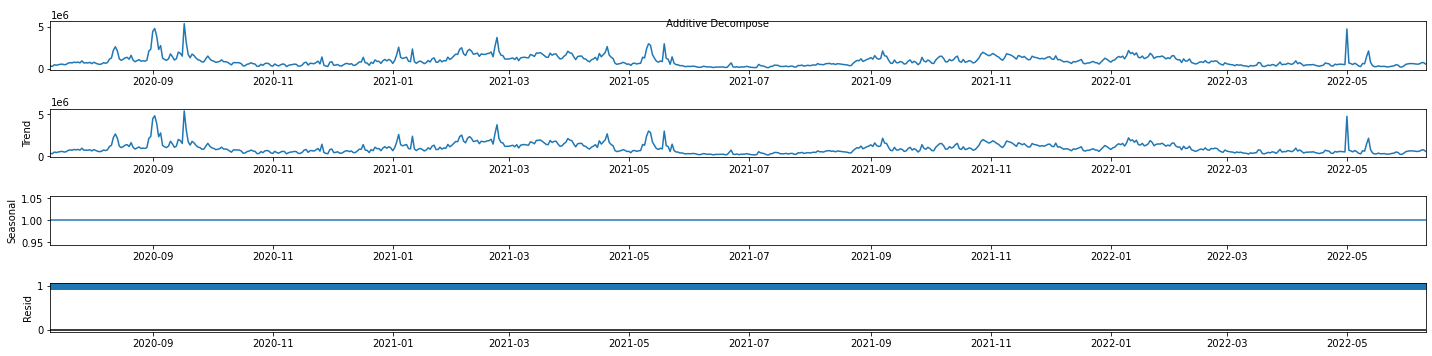

In [25]:
mul_data.plot().suptitle('\n Additive Decompose',fontsize=10)

In [26]:
# Behinde the scenes of Decomposition

In [27]:
dec_data = pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
dec_data.columns = ['seasonality','Trend','residual','actual_values']
dec_data.head()

,seasonality,Trend,residual,actual_values
Date,,,,
2020-07-11,0.0,337351.5945,0.0,337351.5945
2020-07-12,0.0,320853.5193,0.0,320853.5193
2020-07-13,0.0,509608.2875,0.0,509608.2875
2020-07-14,0.0,443512.3935,0.0,443512.3935
2020-07-15,0.0,515874.7704,0.0,515874.7704


In [28]:
adfuller_result = adfuller(Data.cost.values,autolag='AIC')
print(f'ADF Stats:{adfuller_result[0]}')
print(f'p Value:{adfuller_result[1]}')

ADF Stats:-4.30195232428688
p Value:0.00044076700552856616


In [29]:
#Another test rolling test 
#We can manually check for it by computing mean and varienave

In [30]:
# our mean and variance are almost same so we can make to train our model 
#otherwise we needed to perform the transformation

In [31]:
#performing the log transformation

In [32]:
data_log = np.square(Data)

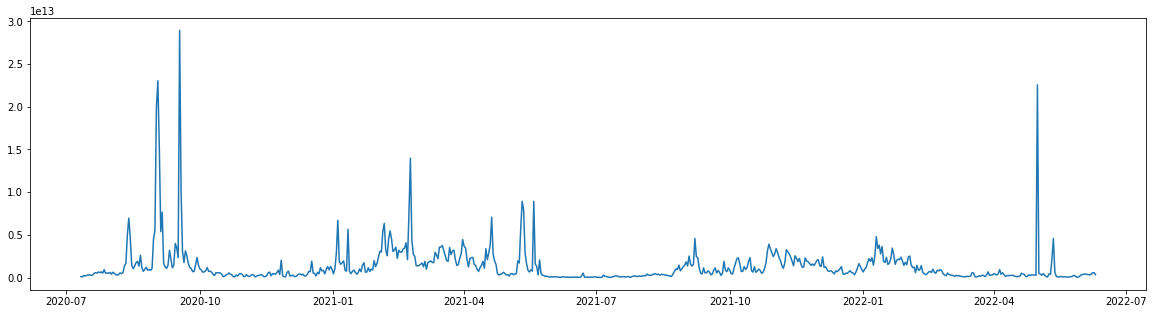

In [33]:
plt.plot(data_log[1800:2500])

In [34]:
sq = seasonal_decompose(data_log[1800:2500], model = 'multiplicative',period = 1)


Text(0.5, 0.98, '\n Multiplicative Decompose')

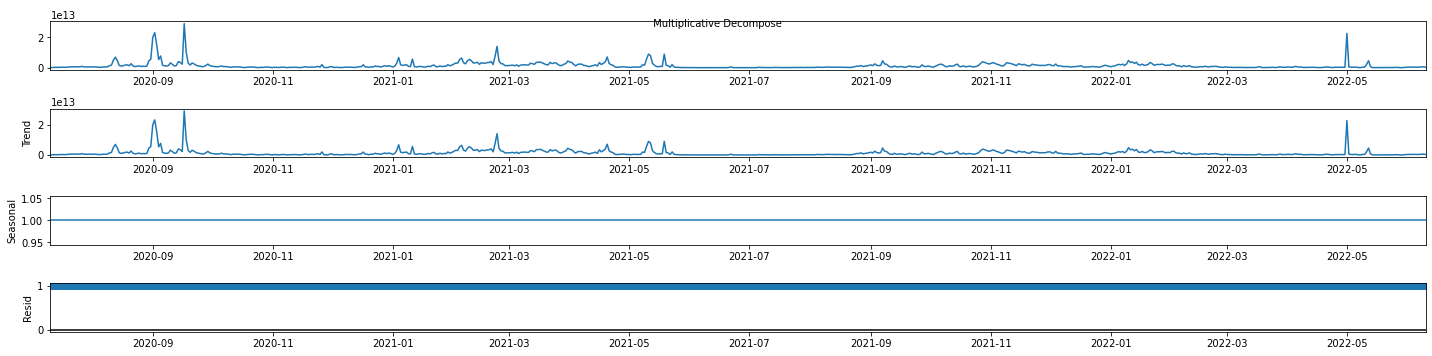

In [35]:
sq.plot().suptitle('\n Multiplicative Decompose',fontsize=10)

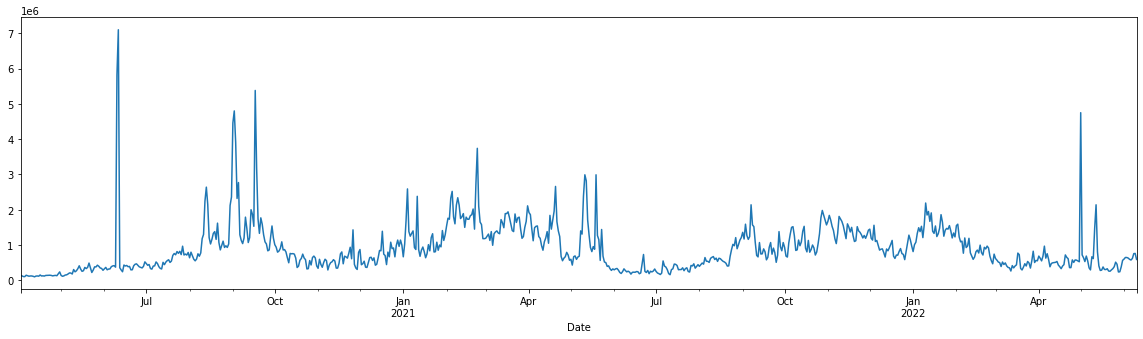

In [36]:
data = Data[1700:2500]
data['cost'].plot()

In [37]:
data.head()

,cost
Date,
2020-04-02,130911.7198
2020-04-03,125467.3621
2020-04-04,106437.5816
2020-04-05,104218.9682
2020-04-06,143863.9535


In [38]:
rolling_mean = data.rolling(12).mean()
rolling_dev = data.rolling(12).std()

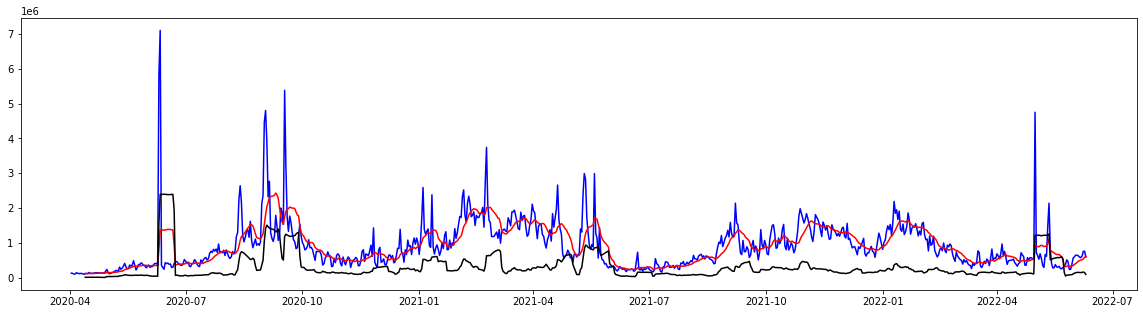

In [39]:
org_plot = plt.plot(data,color = 'blue',label = 'Data Frame')
mean = plt.plot(rolling_mean,color = 'red',label = 'Data Frame')
std_deviation = plt.plot(rolling_dev,color = 'black',label = 'Data Frame')


In [40]:
#since not stationary so we will transform it

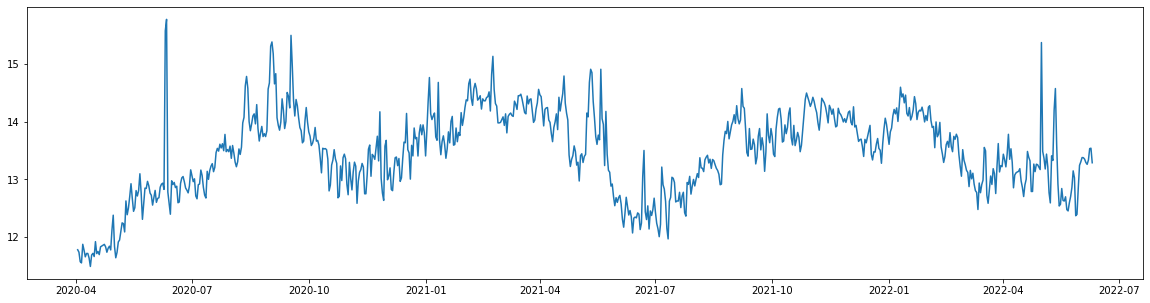

In [41]:
import numpy as np
data_sqr = np.log(data)
plt.plot(data_sqr)

In [42]:
#to furthire ensure we will decompose to seasonal components

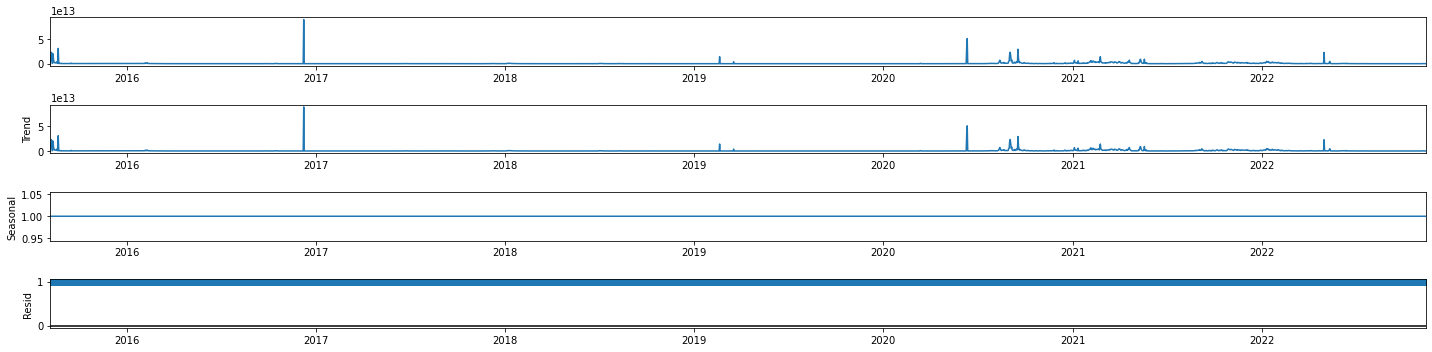

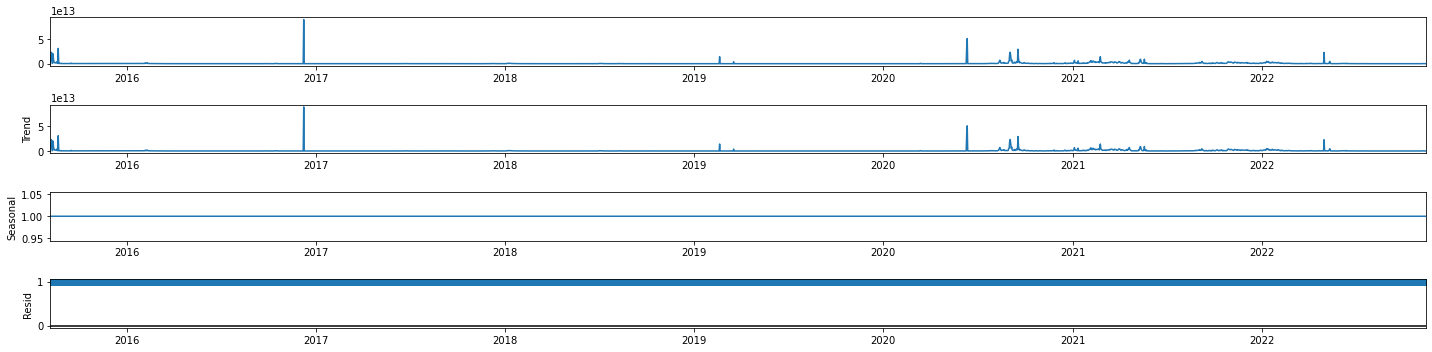

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(data_log,period=1,model = 'multiplicative')
dec.plot()

In [44]:
#since trend component is more contributing

In [45]:
data_sqr_diff = data_sqr - data_sqr.shift()

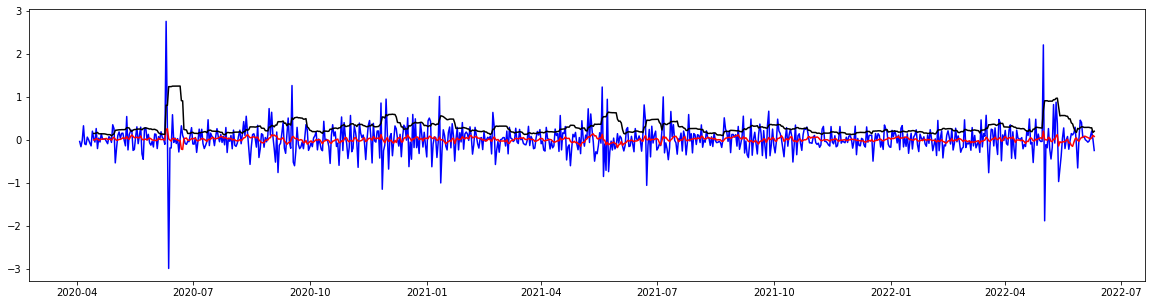

In [46]:
#Again determining the rolling stats

mean2 = data_sqr_diff.rolling(12).mean()
std2 = data_sqr_diff.rolling(12).std()

o = plt.plot(data_sqr_diff,color = 'blue',label = 'orignal')
m = plt.plot(mean2, color = 'red', label = 'Mean')
v = plt.plot(std2,  color ='black', label = 'Variance')

plt.show(block = False)

In [47]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(data_sqr_diff,nlags = 20)
lag_pacf = pacf(data_sqr_diff,nlags = 20)


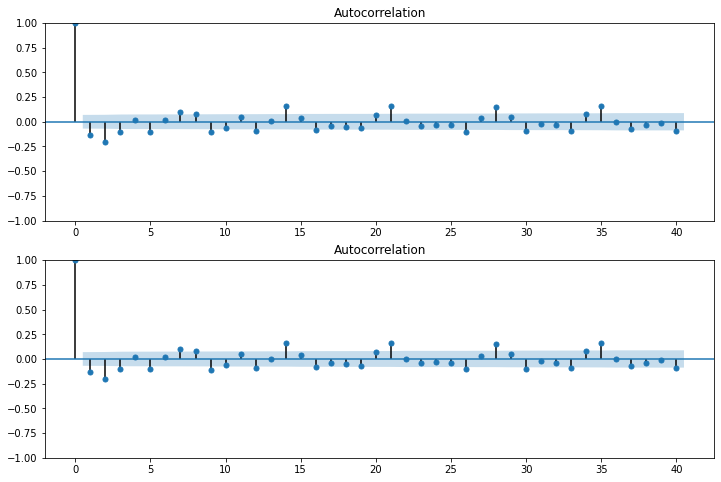

In [48]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_sqr_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data_sqr_diff.dropna(),lags=40,ax=ax2)


In [49]:
import statsmodels.api

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


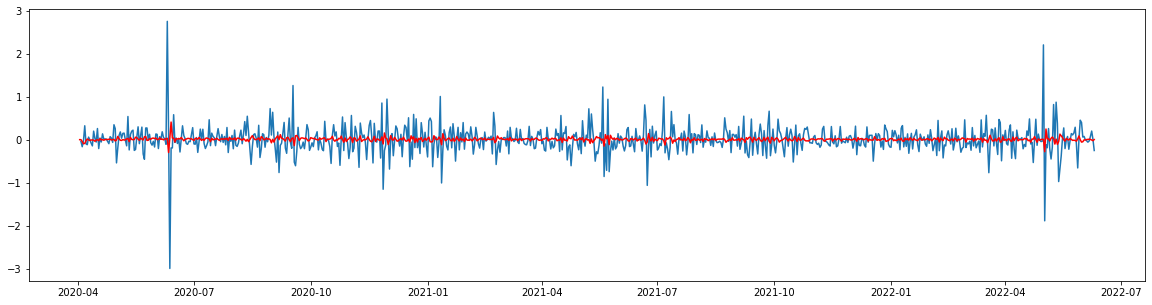

In [50]:
model = statsmodels.tsa.arima.model.ARIMA(data_sqr_diff,order = (1,1,1))
pred = model.fit()
plt.plot(data_sqr_diff)
plt.plot(pred.fittedvalues,color = 'red')

In [51]:
#AS we performed transformation 
#noe taking results back to the orignal scale

In [52]:
Data = pd.read_csv('/content/export-AvgGasPrice.csv',index_col = 0,parse_dates = True)
d = Data[1700:2500]
d.tail()

,cost
Date,
2022-06-06,575171.8522
2022-06-07,619282.5667
2022-06-08,755822.8321
2022-06-09,760952.6391
2022-06-10,591350.0627


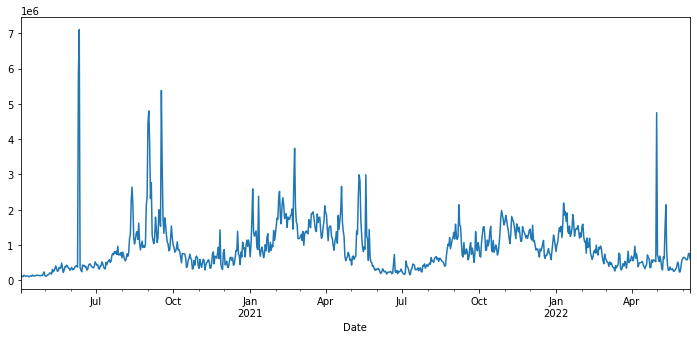

In [53]:
d['cost'].plot(figsize=(12,5))

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
from pmdarima import auto_arima

In [56]:
fit = auto_arima(d['cost'],trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23164.280, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23793.174, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23184.557, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23438.547, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24583.923, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23164.825, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23186.166, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=23164.331, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=23153.251, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=23162.840, Time=0.30 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=23155.264, Time=0.99 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=23162.327, Time=0.38 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=23150.277, Time=2.26 sec
 ARIMA(4,0,4)(0,0,0)[0] i

In [57]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


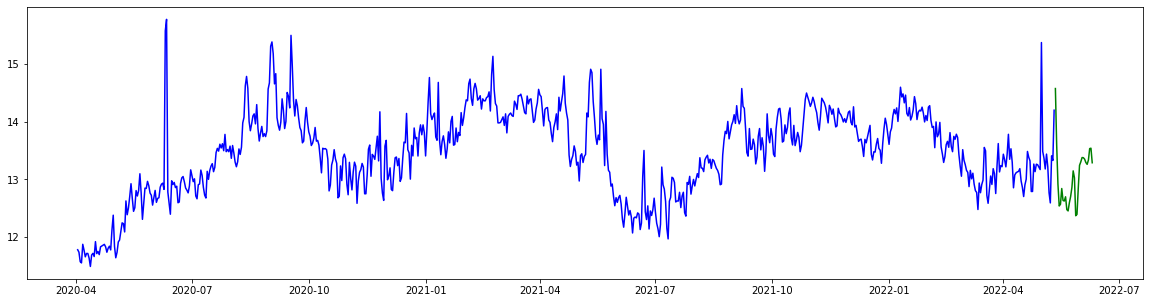

In [78]:
train = data_sqr.iloc[:-30]
test = data_sqr.iloc[-30:]
plt.plot(train,label = 'Train Data',color = 'blue')
plt.plot(test,label = 'Test Data',color = 'green')

In [79]:
print(train.shape,test.shape)
train.head()
test.head()

(770, 1) (30, 1)


,cost
Date,
2022-05-12,14.576316
2022-05-13,13.602438
2022-05-14,12.920770
2022-05-15,12.540798
2022-05-16,12.570877


In [80]:
import statsmodels.api

In [127]:
ts = train['cost']
model = statsmodels.tsa.arima.model.ARIMA(ts,order = (7,0,7))
model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

In [128]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start,end = end,typ='levels')

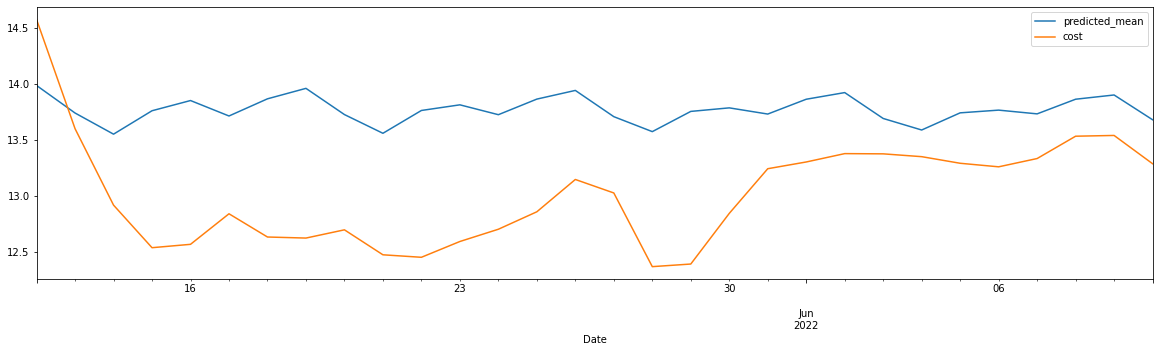

In [129]:
pred.plot(legend = True)
test['cost'].plot(legend = True)

In [125]:
test['cost'].mean()


13.027644505756934

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['cost']))
print(rmse)

0.8965059992439285


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

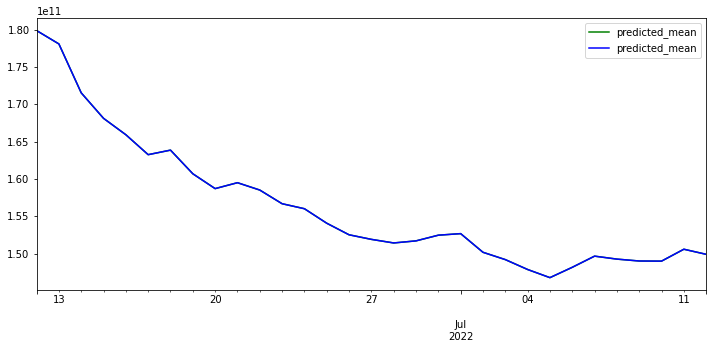

In [120]:


index_future_dates = pd.date_range(start = '2022-06-12',end = '2022-07-12')
m2 = statsmodels.tsa.arima.model.ARIMA(data_log['cost'],order = (5,0,5))
m2 = m2.fit()
pr = m2.predict(start = len(d),end = len(d)+30,typ = 'levels')
pr.index = index_future_dates
pr.plot(figsize=(12,5),legend=True,color = 'green')
pr.plot(legend = True,color = 'blue')

In [121]:
pr.head(10)

2022-06-12    1.798862e+11
2022-06-13    1.780924e+11
2022-06-14    1.715391e+11
2022-06-15    1.681220e+11
2022-06-16    1.659233e+11
2022-06-17    1.632532e+11
2022-06-18    1.638614e+11
2022-06-19    1.606936e+11
2022-06-20    1.587033e+11
2022-06-21    1.594965e+11
Freq: D, Name: predicted_mean, dtype: float64